## EDA Grade Moodle

### EDA Gradec Overall

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
# Đọc dữ liệu điểm từ CSV
df_grade = pd.read_csv("data/udk_moodle_all_grades.csv")

# Chuyển timestamp sang định dạng ngày
df_grade["datetime"] = pd.to_datetime(df_grade["timemodified"], unit='s')

In [5]:
print("📊 Kích thước dữ liệu:", df_grade.shape)
print("📌 Các cột:", list(df_grade.columns))

print("\n👥 Số lượng người học duy nhất:", df_grade["userid"].nunique())
print("📚 Số lượng khóa học duy nhất:", df_grade["courseid"].nunique())
print("📂 Các loại điểm (itemtype):")
print(df_grade["itemtype"].value_counts())

print("\n🎯 Thống kê điểm:")
print(df_grade["finalgrade"].describe())

📊 Kích thước dữ liệu: (20317, 7)
📌 Các cột: ['id', 'timemodified', 'userid', 'courseid', 'finalgrade', 'itemtype', 'datetime']

👥 Số lượng người học duy nhất: 1331
📚 Số lượng khóa học duy nhất: 761
📂 Các loại điểm (itemtype):
itemtype
mod         12614
course       6990
category      562
manual        151
Name: count, dtype: int64

🎯 Thống kê điểm:
count    20317.000000
mean         4.909435
std          4.608386
min         -1.000000
25%         -1.000000
50%          7.000000
75%          9.000000
max         10.000000
Name: finalgrade, dtype: float64


### Phân bố điểm

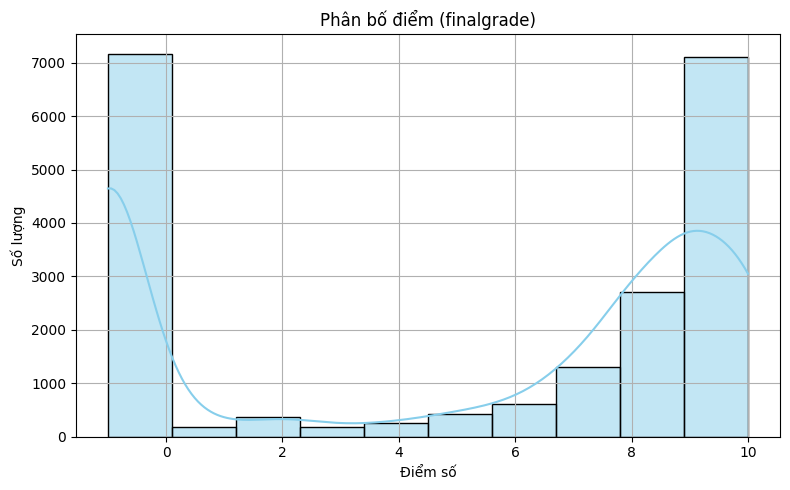

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df_grade["finalgrade"], bins=10, kde=True, color="skyblue")
plt.title("Phân bố điểm (finalgrade)")
plt.xlabel("Điểm số")
plt.ylabel("Số lượng")
plt.grid(True)
plt.tight_layout()
plt.show()

### Số lượng điểm theo loại itemtype

/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_25465/1875367216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_grade, x="itemtype", palette="Set2")


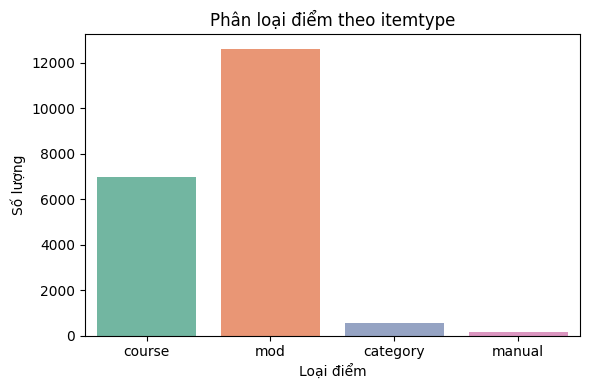

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_grade, x="itemtype", palette="Set2")
plt.title("Phân loại điểm theo itemtype")
plt.xlabel("Loại điểm")
plt.ylabel("Số lượng")
plt.tight_layout()
plt.show()

### Top 10 người dùng có nhiều điểm nhất:

👨‍🎓 Top 10 người dùng có nhiều điểm nhất:
userid
8609    177
9260    167
9151    162
9109    155
9146    151
9169    150
9152    150
8964    129
8670    128
9043    120
Name: count, dtype: int64


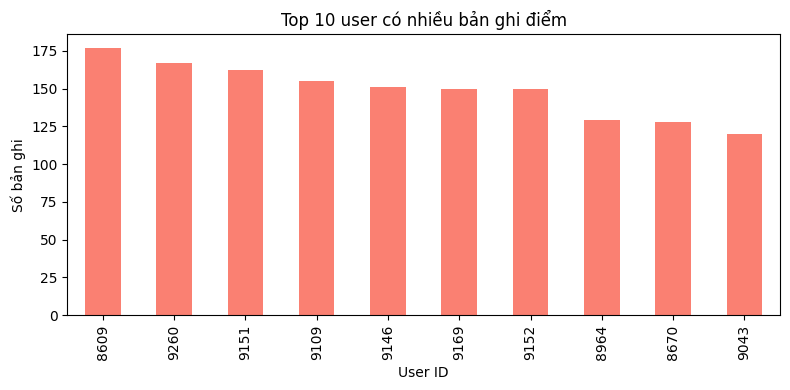

In [8]:
top_users = df_grade["userid"].value_counts().head(10)
print("👨‍🎓 Top 10 người dùng có nhiều điểm nhất:")
print(top_users)

top_users.plot(kind="bar", figsize=(8,4), color="salmon")
plt.title("Top 10 user có nhiều bản ghi điểm")
plt.xlabel("User ID")
plt.ylabel("Số bản ghi")
plt.tight_layout()
plt.show()

### Phân tích điểm theo từng khóa học


📚 Top 10 khóa học có nhiều điểm nhất:
          count      mean  min  max
courseid                           
42          902  1.076497   -1   10
3072        592  4.717905   -1   10
2039        543  1.057090   -1   10
1662        401  1.184539   -1   10
2422        388  3.708763   -1   10
1695        377  4.570292   -1   10
1445        334  6.035928   -1   10
1694        285  1.000000   -1   10
1705        284  2.003521   -1   10
3082        281  2.676157   -1   10


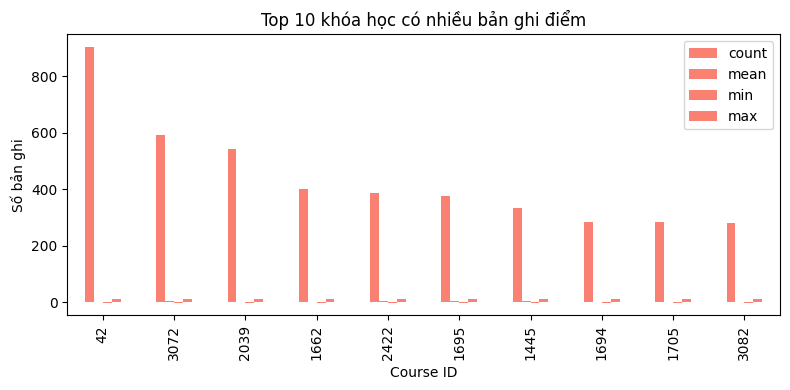

In [10]:
course_stats = df_grade.groupby("courseid")["finalgrade"].agg(["count", "mean", "min", "max"]).sort_values(by="count", ascending=False).head(10)
print("\n📚 Top 10 khóa học có nhiều điểm nhất:")
print(course_stats)


course_stats.plot(kind="bar", figsize=(8,4), color="salmon")
plt.title("Top 10 khóa học có nhiều bản ghi điểm")
plt.xlabel("Course ID")
plt.ylabel("Số bản ghi")
plt.tight_layout()
plt.show()

### Phân tích thời gian cập nhật điểm

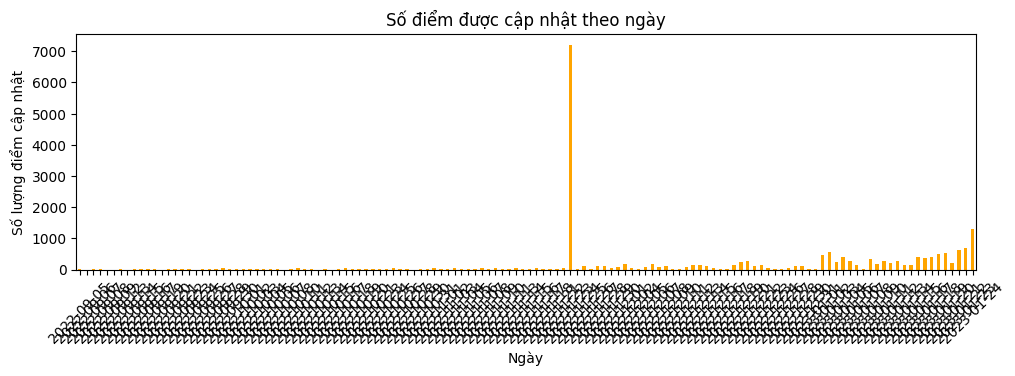

In [11]:
plt.figure(figsize=(10,4))
df_grade["datetime"].dt.date.value_counts().sort_index().plot(kind="bar", color="orange")
plt.title("Số điểm được cập nhật theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Số lượng điểm cập nhật")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### phân tích điểm trong 1 course

📘 Phân tích cho khóa học: 2188
🔢 Số lượng bản ghi điểm: 19
👨‍🎓 Số lượng học viên: 6
📊 Thống kê điểm:
count    19.000000
mean      8.210526
std       2.760414
min       0.000000
25%       6.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: finalgrade, dtype: float64

📂 Phân loại theo itemtype:
itemtype
mod       13
course     6
Name: count, dtype: int64


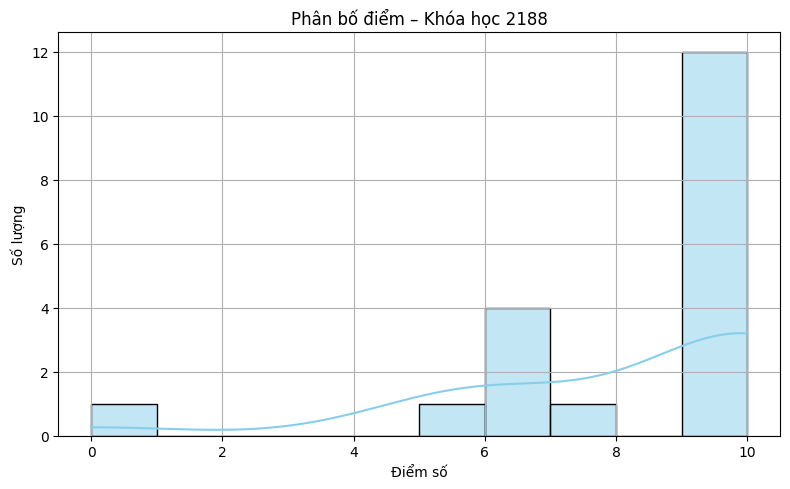

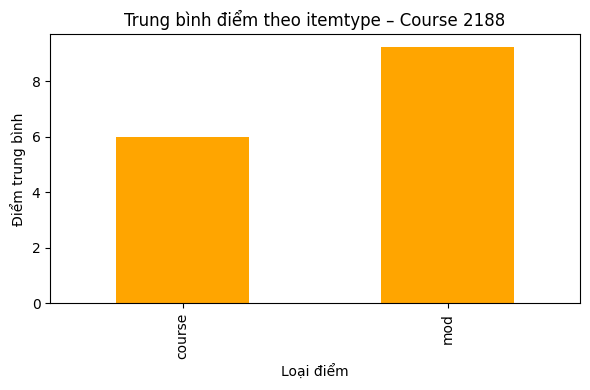

📉 Học viên có điểm dưới trung bình:
      userid  finalgrade itemtype
4995    8034           0      mod
✅ Tỉ lệ học viên đạt điểm >= 5: 94.74%


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu điểm đã có
df = pd.read_csv("data/udk_moodle_all_grades.csv")

# Khóa học cần phân tích
course_id = 2188  # ← Thay ID tại đây nếu muốn

# Lọc dữ liệu theo courseid
df_course = df[df["courseid"] == course_id]
print(f"📘 Phân tích cho khóa học: {course_id}")
print("🔢 Số lượng bản ghi điểm:", len(df_course))
print("👨‍🎓 Số lượng học viên:", df_course['userid'].nunique())
print("📊 Thống kê điểm:")
print(df_course["finalgrade"].describe())

print("\n📂 Phân loại theo itemtype:")
print(df_course["itemtype"].value_counts())
plt.figure(figsize=(8,5))
sns.histplot(df_course["finalgrade"], bins=10, kde=True, color="skyblue")
plt.title(f"Phân bố điểm – Khóa học {course_id}")
plt.xlabel("Điểm số")
plt.ylabel("Số lượng")
plt.grid(True)
plt.tight_layout()
plt.show()

avg_by_item = df_course.groupby("itemtype")["finalgrade"].mean().sort_values()

plt.figure(figsize=(6,4))
avg_by_item.plot(kind="bar", color="orange")
plt.title(f"Trung bình điểm theo itemtype – Course {course_id}")
plt.ylabel("Điểm trung bình")
plt.xlabel("Loại điểm")
plt.tight_layout()
plt.show()

df_low_score = df_course[df_course["finalgrade"] < 5]
print("📉 Học viên có điểm dưới trung bình:")
print(df_low_score[["userid", "finalgrade", "itemtype"]].head())

pass_rate = (df_course["finalgrade"] >= 5).mean()
print(f"✅ Tỉ lệ học viên đạt điểm >= 5: {pass_rate:.2%}")